In [9]:
import numpy as np
import pandas as pd


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("H:\Python\project2\ADNI_FDG_SUVR_main.csv", na_values='--')

In [11]:
# 提取特徵和目標
X = data.iloc[:, 14:]
y = data['CurrentDXpmod']
# 使用SimpleImputer處理缺失值
imputer = SimpleImputer(strategy='mean')  # 使用均值填充缺失值
X = imputer.fit_transform(X)

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

          AD       0.75      0.54      0.63        92
          CN       0.41      0.48      0.44       132
         MCI       0.65      0.65      0.65       271

    accuracy                           0.59       495
   macro avg       0.60      0.56      0.57       495
weighted avg       0.60      0.59      0.59       495

Accuracy:  58.59
F1 Score:  59.03


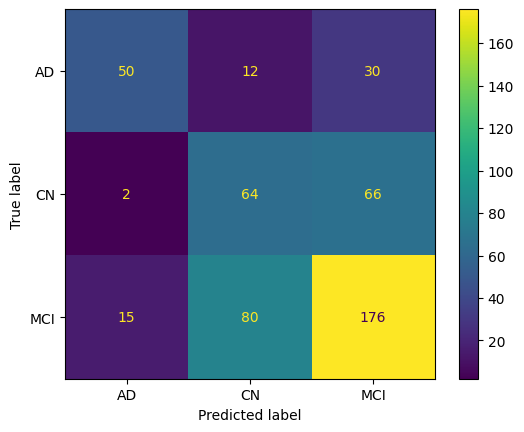

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 Score: ', "%.2f" % (f1*100))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=model.classes_)
cm_display.plot()

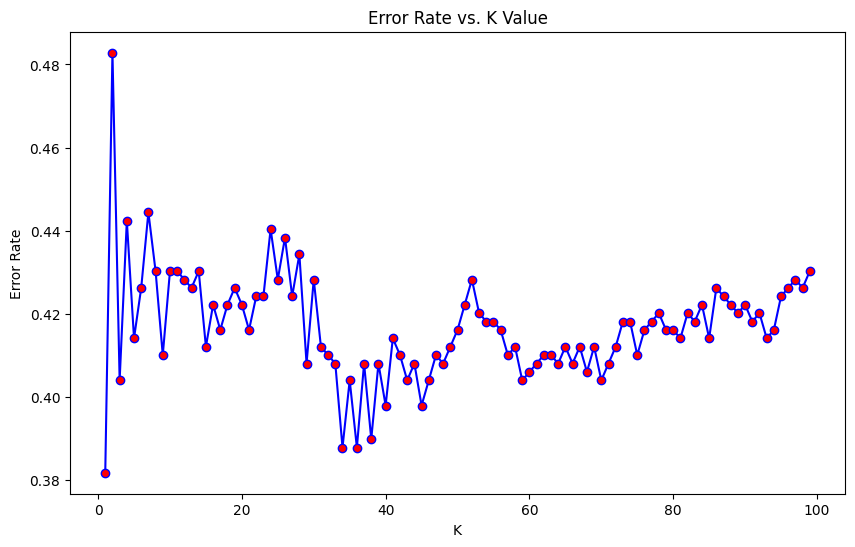

In [14]:
error_rate = []

for i in range(1,100):
    model_new = KNeighborsClassifier(n_neighbors=i)
    model_new.fit(X_train,y_train)
    pred_i = model_new.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue',marker='o', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [15]:
model_new = KNeighborsClassifier(n_neighbors=36)
model_new.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

# Show classification report and Confusion Matrix

              precision    recall  f1-score   support

          AD       0.89      0.36      0.51        92
          CN       0.48      0.24      0.32       132
         MCI       0.61      0.88      0.72       271

    accuracy                           0.61       495
   macro avg       0.66      0.49      0.52       495
weighted avg       0.63      0.61      0.57       495

Accuracy:  61.21
F1 Score:  57.43


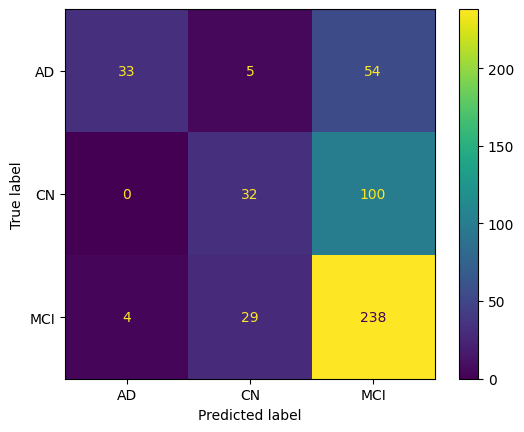

In [16]:
y_pred = model_new.predict(X_test)
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1 Score: ', "%.2f" % (f1*100))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=model.classes_)
cm_display.plot()